In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
import plotly.express as px

In [13]:
# Load the data
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [14]:
le = LabelEncoder()
cat_features = tips.select_dtypes(include='category').columns

for features in cat_features:
    tips[features] = le.fit_transform(tips[features])

In [16]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,0,0,2,0,2
1,10.34,1.66,1,0,2,0,3
2,21.01,3.50,1,0,2,0,3
3,23.68,3.31,1,0,2,0,2
4,24.59,3.61,0,0,2,0,4


In [21]:
# Scale the data using StandardScaler
scaler = StandardScaler()
tips_scaled = scaler.fit_transform(tips) 

In [29]:
# Perform PCA
pca = PCA()  
X_pca = pca.fit_transform(tips_scaled)

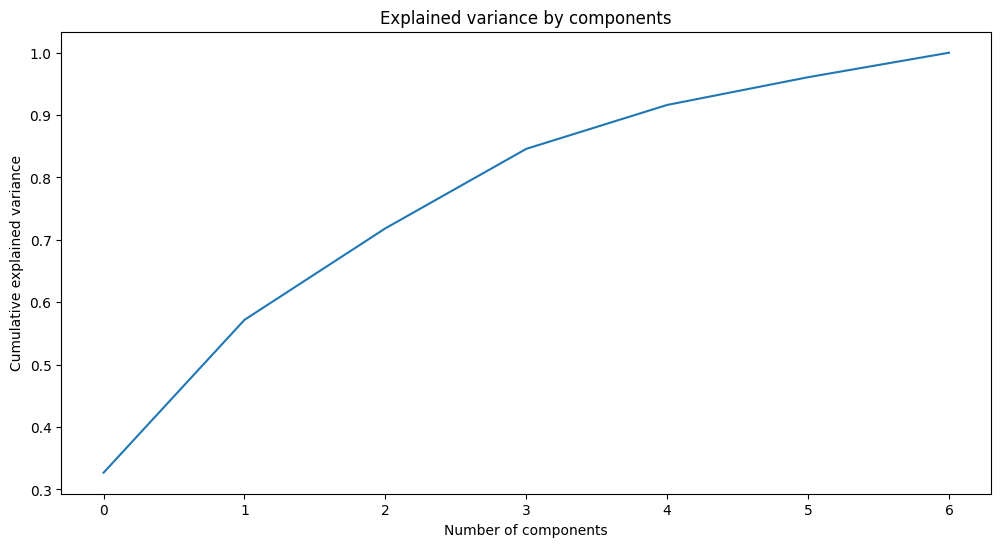

In [30]:
# Plot the explained variance ratio
plt.figure(figsize=(12,6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.title('Explained variance by components')
plt.show()

In [31]:
# Create a DataFrame to show the loadings
loadings = pd.DataFrame(pca.components_.T, columns=[f'PC{i+1}' for i in range(pca.n_components_)], index=tips.columns)
loadings

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
total_bill,0.577289,0.133642,0.164816,0.061756,-0.058183,0.378659,0.686390
tip,0.531650,0.178333,0.159316,-0.010375,-0.637807,-0.274214,-0.421978
sex,0.189111,-0.152571,-0.588523,0.762364,0.000506,-0.115541,0.007162
smoker,0.036649,-0.335732,0.724260,0.501763,0.212334,0.111732,-0.228151
day,-0.156579,0.660434,-0.047053,0.229846,0.003218,0.606759,-0.340735
time,-0.281249,0.556479,0.266919,0.297170,-0.004329,-0.572115,0.352618
size,0.493317,0.261729,-0.055523,-0.148236,0.738039,-0.245190,-0.241370
